# Julia - Speed Comparison to Python

In [1]:
VERSION

v"1.8.2"

In [2]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 4 × Intel(R) Xeon(R) Platinum 8375C CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, icelake-server)
  Threads: 1 on 4 virtual cores


In [3]:
import Pkg
Pkg.add(["DataFrames", "BenchmarkTools", "CpuId", "StatsPlots"])

   Resolving package versions...
   Installed Calculus ───────────────────── v0.5.1
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed GR_jll ─────────────────────── v0.69.1+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed HypergeometricFunctions ────── v0.3.11
   Installed OffsetArrays ───────────────── v1.12.8
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed StatsFuns ──────────────────── v1.0.1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LoggingExtras ──────────────── v0.4.9
   Installed FFTW ───────────────────────── v1.5.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Grisu ──────────────────────── v1.0.2
   Installed PDMats ─────────────────────── v0.11.16
   Installed Measures ───────────────────── v0.3.1
   Installed NearestNeighbo

In [16]:
using CpuId
cpuinfo()

| Cpu Property       | Value                                                      |
|:------------------ |:---------------------------------------------------------- |
| Brand              | Intel(R) Xeon(R) Platinum 8375C CPU @ 2.90GHz              |
| Vendor             | :Intel                                                     |
| Architecture       | :UnknownIntel                                              |
| Model              | Family: 0x06, Model: 0x6a, Stepping: 0x06, Type: 0x00      |
| Cores              | 2 physical cores, 4 logical cores (on executing CPU)       |
|                    | Hyperthreading hardware capability detected                |
| Clock Frequencies  | Not supported by CPU                                       |
| Data Cache         | Level 1:3 : (48, 1280, 55296) kbytes                       |
|                    | 64 byte cache line size                                    |
| Address Size       | 48 bits virtual, 46 bits physical                          |
| SIMD               | 512 bit = 64 byte max. SIMD vector size                    |
| Time Stamp Counter | TSC is accessible via `rdtsc`                              |
|                    | TSC runs at constant rate (invariant from clock frequency) |
| Perf. Monitoring   | Performance Monitoring Counters (PMC) are not supported    |
| Hypervisor         | Yes, KVM                                                   |


# Define Data

In [5]:
using Random
using DataFrames

In [6]:
rng1 = MersenneTwister(12);
rng2 = MersenneTwister(42);

In [7]:
rand_array1 = randn(rng1, Float32, 1000000);
rand_array2 = randn(rng2, Float32, 1000000);

In [8]:
df = DataFrame(series1=rand_array1, series2=rand_array2);
first(df,10)

Row,series1,series2
,Float32,Float32
1,-0.218297,-0.556027
2,-1.72184,-0.444383
3,0.603716,0.0271553
4,-0.211798,-0.299484
5,2.01332,1.77786
6,0.763531,-1.1449
7,-0.0981352,-0.468606
8,0.142469,0.156143
9,-2.89351,-2.64199


# A simple function

In [9]:
# define summing function

function sum_nums(x,y)
    x + y
end

sum_nums (generic function with 1 method)

In [10]:
using BenchmarkTools


In [11]:
@benchmark sum_nums(data.series1, data.series2) setup=(data=DataFrame(series1=rand_array1, series2=rand_array2))

BenchmarkTools.Trial: 2818 samples with 1 evaluation.
 Range (min … max):  552.452 μs …   4.659 ms  ┊ GC (min … max): 0.00% … 83.55%
 Time  (median):     657.470 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   711.752 μs ± 237.623 μs  ┊ GC (mean ± σ):  6.08% ± 11.87%

  ▁▄▆▇█▇▇▆▆▅▅▂▁                                         ▁       ▂
  █████████████▇▇▆▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▄▆████▇▇▇▄ █
  552 μs        Histogram: log(frequency) by time       1.74 ms <

 Memory estimate: 3.81 MiB, allocs estimate: 2.

# A more complex function

In [12]:
function categorise(a, b)::Float32
    if a < 0
        return a * 2 + b
    elseif b < 0
        return a + 2 * b
    else
        return 0
    end
end

categorise (generic function with 1 method)

In [13]:
data2 = select(df,[:series1, :series2]=>ByRow(categorise)=>AsTable)

Row,x1
,Float32
1,-0.992621
2,-3.88807
3,0.0
4,-0.723079
5,0.0
6,-1.52627
7,-0.664876
8,0.0
9,-8.42901


In [15]:
@benchmark select(data,[:series1, :series2]=>ByRow(categorise)=>AsTable) setup=(data=DataFrame(series1=rand_array1, series2=rand_array2))

BenchmarkTools.Trial: 573 samples with 1 evaluation.
 Range (min … max):  7.168 ms …  10.588 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     7.318 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   7.616 ms ± 565.776 μs  ┊ GC (mean ± σ):  1.76% ± 4.35%

  ▂▆█▇▄▂▁▁▁  ▁  ▁    ▁        ▁▂▂                              
  █████████▇▇███████▁█▇▇▇▅▇▇▅▄███▇█▅▅▇▅▄▅▁▆▄▄▄▁▄▅▁▁▁▁▄▁▁▄▄▁▁▄ ▇
  7.17 ms      Histogram: log(frequency) by time      9.72 ms <

 Memory estimate: 7.65 MiB, allocs estimate: 375.

# Comparison

All tests both in Python and Julia were conducted on a Intel(R) Xeon(R) Platinum 8375C CPU to keep the comparison fair.

The results in the dataframe below are taken from the current notebook (Julia) and the following notebook (Python):

https://github.com/thetestspecimen/notebooks/blob/main/julia-python-comparison/python.ipynb

**Note:** Row 1 in the table represents the 'simple function', and Row 2 the more 'complex' function. As the native pandas and native numpy methods are not capable of processing the more complex function, their values have been set to zero.


In [72]:
results = DataFrame(a_iter_tuples=[419.14,419.22], b_list_comp=[179.64,188.33], c_np_vectorize=[163.07,140.78], d_pd_native=[0.96,0], e_np_native=[0.81,0], f_julia=[0.71,7.62] )

Row,a_iter_tuples,b_list_comp,c_np_vectorize,d_pd_native,e_np_native,f_julia
,Float64,Float64,Float64,Float64,Float64,Float64
1,419.14,179.64,163.07,0.96,0.81,0.71
2,419.22,188.33,140.78,0.0,0.0,7.62


## Compare all

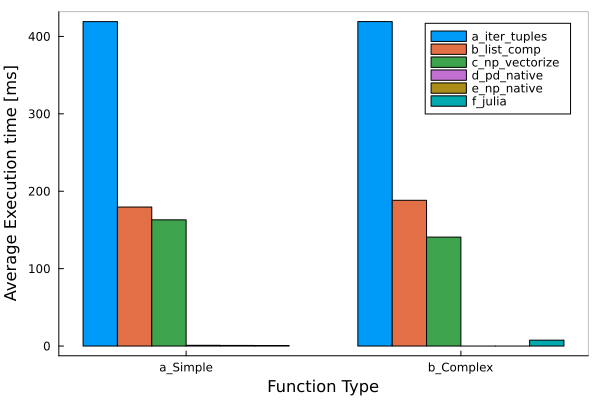

In [79]:
using StatsPlots

name = repeat(["a_Simple", "b_Complex"], outer=6)
category = repeat(names(results), inner=2)

groupedbar(name, Matrix(results), group=category,
          bar_position = :dodge, 
          bar_width=0.75,
          ylabel = "Average Execution time [ms]",
          xlabel = "Function Type",
          framestyle = :semi,
          formatter = :plain,
          legend = :topright,
          grid = false)

# Fastest simple function methods

This compares the two fastest Python methods to Julia using the 'simple' function.

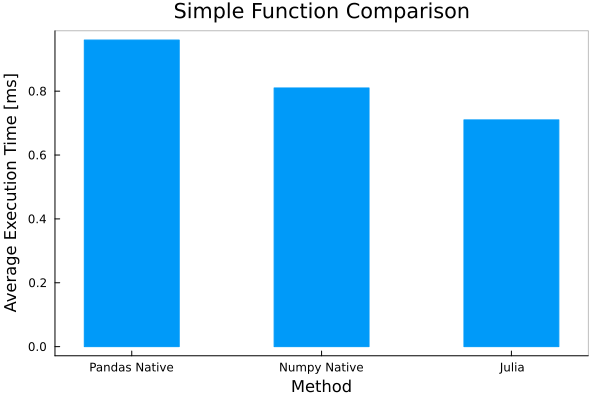

In [80]:
bar(["Pandas Native", "Numpy Native", "Julia"],Vector(results[1,4:6]),
    title = "Simple Function Comparison", 
    xlabel = "Method",
    ylabel = "Average Execution Time [ms]",
    legend = false,
    bar_width = 0.50,
    linecolor = :match,
    grid = false,
    framestyle=:semi
    )

## Fastest complex function methods

This compares numpy vectorize (the fastest Python method) to Julia using the more 'complex' method which uses conditional statements.

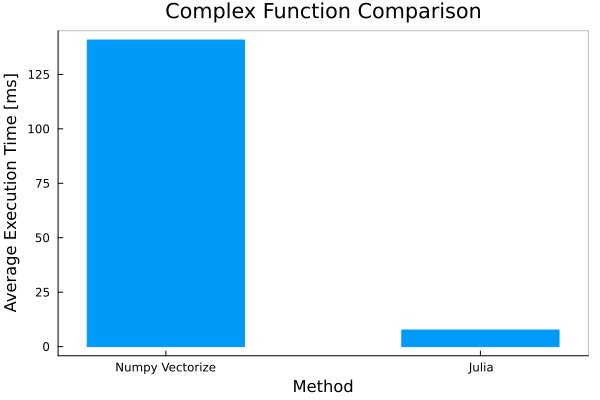

In [82]:
bar(["Numpy Vectorize", "Julia"],Vector(results[2,[3,6]]),
    title = "Complex Function Comparison", 
    xlabel = "Method",
    ylabel = "Average Execution Time [ms]",
    legend = false,
    bar_width = 0.50,
    linecolor = :match,
    grid = false,
    framestyle=:semi
    )